In [471]:
import pandas as pd 
from dython.nominal import associations
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, r2_score, mean_squared_error, roc_curve, roc_auc_score, auc

# Análise e Limpeza do DataSet de Teste

In [472]:
test = pd.read_csv('test.csv') #carrega o dataset de teste

In [473]:
test.head() #visualização inicial dos dados de teste

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [474]:
test.describe() #descrição dos dados de teste

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


In [475]:
test.info() #informações acerca dos dados de teste

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


Podemos perceber, após essa primeira visualização dos nossos dados, que a única correção a ser feita é a dos dados faltantes.

Uma análise do dataset leva à conclusão de que, à exceção da coluna major_discipline, os dados inseridos nas demais não podem ser deduzidos a partir de outras colunas.

Em vista disso, a melhor estratégia, nesse contexto (e considerando que a maioria das informações é do tipo objeto), é trocar os dados nulos pela moda dos dados.

In [476]:
test.set_index('enrollee_id', inplace = True) #seta a coluna de ID como o index do nosso dataset

## Gender

In [477]:
test.gender.isna().sum() #dados faltantes

508

In [478]:
test.gender.value_counts().index[0] #a moda da coluna

'Male'

In [479]:
test.gender.fillna(test.gender.value_counts().index[0], inplace = True) #substitui os dados faltantes pela moda

In [480]:
test.gender.isna().sum() #checa o sucesso da operação anterior

0

## Company_size

In [481]:
test.company_size.isna().sum() #dados faltantes

622

In [482]:
test.company_size.value_counts().index[0] #a moda da coluna

'50-99'

In [483]:
test.company_size.fillna(test.company_size.value_counts().index[0], inplace = True) #substitui os dados faltantes pela moda

In [484]:
test.company_size.isna().sum() #checa o sucesso da operação

0

## Company_type

In [485]:
test.company_type.isna().sum() #dados faltantes

634

In [486]:
test.company_type.value_counts().index[0] #a moda da coluna

'Pvt Ltd'

In [487]:
test.company_type.fillna(test.company_type.value_counts().index[0], inplace = True) #substitui os dados faltantes pela moda

In [488]:
test.company_type.isna().sum() #checa o sucesso da operação

0

## Last_new_job

In [489]:
test.last_new_job.isna().sum() #dados faltantes

40

In [490]:
test.last_new_job.value_counts().index[0] #a moda da coluna

'1'

In [491]:
test.last_new_job.fillna(test.last_new_job.value_counts().index[0], inplace = True) #substitui os dados faltantes pela moda

In [492]:
test.last_new_job.isna().sum() #checa o sucesso da operação

0

## Enrolled_university

In [493]:
test.enrolled_university.isna().sum() #dados faltantes

31

In [494]:
test.enrolled_university.value_counts().index[0] #a moda da coluna

'no_enrollment'

In [495]:
test.enrolled_university.fillna(test.enrolled_university.value_counts().index[0], inplace = True) 
#substitui os dados faltantes pela moda

In [496]:
test.enrolled_university.isna().sum() #checa o sucesso da operação

0

## Education_level

In [497]:
test.education_level.isna().sum() #dados faltantes

52

In [498]:
test.education_level.value_counts().index[0] #a moda da coluna

'Graduate'

In [499]:
#substitui os dados faltantes pela moda
test.education_level.fillna(test.education_level.value_counts().index[0], inplace = True) 

In [500]:
test.education_level.isna().sum() #checa o sucesso da operação

0

## Major_discipline

Para essa coluna, podemos checar o status de matrícula ou nível de educação da pessoa e, para cada um desses valores com um NaN correspondente em major_discipline, podemos substituir o dado faltante por esse valor. 

In [501]:
test.major_discipline.unique() #checa os valores únicos da coluna major_discipline

array(['STEM', nan, 'Other', 'Business Degree', 'Arts', 'Humanities',
       'No Major'], dtype=object)

In [502]:
test.education_level.unique() #vejamos os valores únicos da coluna education_level

array(['Graduate', 'High School', 'Masters', 'Phd', 'Primary School'],
      dtype=object)

In [503]:
test.enrolled_university.unique() #vejamos os valores únicos da coluna enrolled_university

array(['Full time course', 'no_enrollment', 'Part time course'],
      dtype=object)

In [504]:
test.major_discipline.isna().sum() #dados faltantes em major discipline

312

In [505]:
#checa os dados faltantes em major_discipline que correspondem ao nível de educação High School
test[test['education_level'] == 'High School']['major_discipline'].isna().sum() 

222

In [506]:
#checa os dados faltantes em major_discipline que correspondem ao nível de educação Primary School
test[test['education_level'] == 'Primary School']['major_discipline'].isna().sum()

36

In [507]:
#checa os dados faltantes em major_discipline que correspondem ao status Não Matriculado
test[test['enrolled_university'] == 'no_enrollment']['major_discipline'].isna().sum()

177

In [508]:
#checa os dados faltantes em major_discipline que correspondem ao status No Major
test[test['enrolled_university'] == 'No Major']['major_discipline'].isna().sum()

0

In [509]:
#substitui os dados faltantes em major_discipline, conforme as restrições checadas acima, pelo valor único 'No Major'
test.loc[(test['major_discipline'].isna()) & (test['enrolled_university'] == 'no_enrollment'), 'major_discipline'] = 'No Major'
test.loc[(test['major_discipline'].isna()) & (test['education_level'] == 'High School'), 'major_discipline'] = 'No Major'
test.loc[(test['major_discipline'].isna()) & (test['education_level'] == 'Primary School'), 'major_discipline'] = 'No Major'

In [510]:
test[test['education_level'] == 'High School']['major_discipline'].isna().sum() #checa o sucesso da operação

0

In [511]:
test[test['education_level'] == 'Primary School']['major_discipline'].isna().sum() #checa o sucesso da operação

0

In [512]:
test[test['enrolled_university'] == 'no_enrollment']['major_discipline'].isna().sum() #checa o sucesso da operação

0

In [513]:
test.major_discipline.isna().sum() #checa se faltam mais dados faltantes a serem preenchidos

15

In [514]:
test[test.major_discipline.isna()] #checa se faltam mais dados faltantes a serem preenchidos

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
enrollee_id,,,,,,,,,,,,
16287,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,NaN,3,50-99,Funded Startup,1,4
29033,city_21,0.624,Male,No relevent experience,Full time course,Graduate,NaN,2,50-99,Pvt Ltd,never,110
9462,city_21,0.624,Male,No relevent experience,Part time course,Graduate,NaN,1,50-99,Pvt Ltd,never,204
30486,city_30,0.698,Male,No relevent experience,Full time course,Graduate,NaN,4,50-99,Funded Startup,1,18
6720,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,NaN,2,10/49,Pvt Ltd,1,68
19102,city_9,0.743,Male,Has relevent experience,Full time course,Graduate,NaN,19,10/49,Funded Startup,2,128
6837,city_90,0.698,Male,No relevent experience,Full time course,Graduate,NaN,6,50-99,Pvt Ltd,4,37
14271,city_103,0.920,Male,No relevent experience,Full time course,Graduate,NaN,11,<10,Pvt Ltd,>4,58
31672,city_126,0.479,Male,Has relevent experience,Full time course,Graduate,NaN,<1,<10,Public Sector,1,29


Vemos, portanto, que os dados faltantes restantes na coluna major_discipline não se relacionam de nenhuma forma com alguma outra coluna.

Voltemos à nossa estratégia inicial: usar a moda.

In [515]:
test.major_discipline.value_counts().index[0] #a moda da coluna

'STEM'

In [516]:
#substitui os dados faltantes pela moda
test.major_discipline.fillna(test.major_discipline.value_counts().index[0], inplace = True)

## Experience

In [517]:
test.experience.isna().sum() #dados faltantes

5

In [518]:
test.experience.value_counts().index[0] #a moda da coluna

'>20'

In [519]:
test.experience.fillna(test.experience.value_counts().index[0], inplace = True) #substitui os dados faltantes pela moda

In [520]:
test.experience.isna().sum() #checa o sucesso da operação

0

## Checa o sucesso da análise e limpeza

In [521]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 32403 to 12215
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    2129 non-null   object 
 1   city_development_index  2129 non-null   float64
 2   gender                  2129 non-null   object 
 3   relevent_experience     2129 non-null   object 
 4   enrolled_university     2129 non-null   object 
 5   education_level         2129 non-null   object 
 6   major_discipline        2129 non-null   object 
 7   experience              2129 non-null   object 
 8   company_size            2129 non-null   object 
 9   company_type            2129 non-null   object 
 10  last_new_job            2129 non-null   object 
 11  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 216.2+ KB


Podemos ver, com isso, que todas as alterações foram bem sucedidas e não há mais nada a ser feito.

Partamos, então, ao dataset de treino.

# Análise e Limpeza do Dataset de Treino

In [522]:
train = pd.read_csv('train.csv') #carrega o dataset de treino

In [523]:
train.head() #visualização inicial dos dados de treino

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [524]:
train.describe() #descrição dos dados de treino

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [525]:
train.info() #informações acerca dos dados de treino

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Perceba que o dataset de treino se assemelha, em termos de análise e limpeza, ao dataset de teste.

Vamos, portanto, realizar passos semelhantes, dispensando maiores explicações do processo!

In [526]:
train.set_index('enrollee_id', inplace = True) #seta a coluna de ID como o index do nosso dataset

## Gênero

In [527]:
train.gender.isna().sum() #dados faltantes

4508

In [528]:
train.gender.value_counts().index[0] #a moda da coluna

'Male'

In [529]:
train.gender.fillna(train.gender.value_counts().index[0], inplace = True) #substitui os dados faltantes pela moda

In [530]:
train.gender.isna().sum() #checa o sucesso da operação anterior

0

## Company_size

In [531]:
train.company_size.isna().sum() #dados faltantes

5938

In [532]:
train.company_size.value_counts().index[0] #a moda da coluna

'50-99'

In [533]:
train.company_size.fillna(train.company_size.value_counts().index[0], inplace = True) #substitui os dados faltantes pela moda

In [534]:
train.company_size.isna().sum() #checa o sucesso da operação anterior

0

## Company_type

In [535]:
train.company_type.isna().sum() #dados faltantes

6140

In [536]:
train.company_type.value_counts().index[0] #a moda da coluna

'Pvt Ltd'

In [537]:
train.company_type.fillna(train.company_type.value_counts().index[0], inplace = True) #substitui os dados faltantes pela moda

In [538]:
train.company_type.isna().sum() #checa o sucesso da operação anterior

0

## Last_new_job

In [539]:
train.last_new_job.isna().sum() #dados faltantes

423

In [540]:
train.last_new_job.value_counts().index[0] #a moda da coluna

'1'

In [541]:
train.last_new_job.fillna(train.last_new_job.value_counts().index[0], inplace = True) #substitui os dados faltantes pela moda

In [542]:
train.last_new_job.isna().sum() #checa o sucesso da operação anterior

0

## Enrolled_university

In [543]:
train.enrolled_university.isna().sum() #dados faltantes

386

In [544]:
train.enrolled_university.value_counts().index[0] #a moda da coluna

'no_enrollment'

In [545]:
train.enrolled_university.fillna(train.last_new_job.value_counts().index[0], inplace = True) #substitui os dados faltantes pela moda

In [546]:
train.enrolled_university.isna().sum() #checa o sucesso da operação anterior

0

## Education_level

In [547]:
train.education_level.isna().sum() #dados faltantes

460

In [548]:
train.education_level.value_counts().index[0] #a moda da coluna

'Graduate'

In [549]:
train.education_level.fillna(train.education_level.value_counts().index[0], inplace = True) #substitui os dados faltantes pela moda

In [550]:
train.education_level.isna().sum() #checa o sucesso da operação anterior

0

## Major_discipline

In [551]:
train.major_discipline.unique() #checa os valores únicos da coluna major_discipline

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [552]:
train.education_level.unique() #vejamos os valores únicos da coluna education_level

array(['Graduate', 'Masters', 'High School', 'Phd', 'Primary School'],
      dtype=object)

In [553]:
train.enrolled_university.unique() #vejamos os valores únicos da coluna enrolled_university

array(['no_enrollment', 'Full time course', '1', 'Part time course'],
      dtype=object)

In [554]:
train.major_discipline.isna().sum() #dados faltantes em major discipline

2813

In [555]:
#checa os dados faltantes em major_discipline que correspondem ao nível de educação High School
train[train['education_level'] == 'High School']['major_discipline'].isna().sum() 

2017

In [556]:
#checa os dados faltantes em major_discipline que correspondem ao nível de educação Primary School
train[train['education_level'] == 'Primary School']['major_discipline'].isna().sum()

308

In [557]:
#checa os dados faltantes em major_discipline que correspondem ao status Não Matriculado
train[train['enrolled_university'] == 'no_enrollment']['major_discipline'].isna().sum()

1481

In [558]:
#checa os dados faltantes em major_discipline que correspondem ao status No Major
train[train['enrolled_university'] == 'No Major']['major_discipline'].isna().sum()

0

In [559]:
#substitui os dados faltantes em major_discipline, conforme as restrições checadas acima, pelo valor único 'No Major'
train.loc[(train['major_discipline'].isna()) & (train['enrolled_university'] == 'no_enrollment'), 'major_discipline'] = 'No Major'
train.loc[(train['major_discipline'].isna()) & (train['education_level'] == 'High School'), 'major_discipline'] = 'No Major'
train.loc[(train['major_discipline'].isna()) & (train['education_level'] == 'Primary School'), 'major_discipline'] = 'No Major'

In [560]:
train[train['education_level'] == 'High School']['major_discipline'].isna().sum() #checa o sucesso da operação

0

In [561]:
train[train['education_level'] == 'Primary School']['major_discipline'].isna().sum() #checa o sucesso da operação

0

In [562]:
train[train['enrolled_university'] == 'no_enrollment']['major_discipline'].isna().sum() #checa o sucesso da operação

0

In [563]:
train.major_discipline.isna().sum() #checa se faltam mais dados faltantes a serem preenchidos

202

In [564]:
train[train.major_discipline.isna()] #checa se faltam mais dados faltantes a serem preenchidos

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
5826,city_21,0.624,Male,No relevent experience,1,Graduate,NaN,2,50-99,Pvt Ltd,never,24,0.0
4830,city_90,0.698,Male,No relevent experience,1,Graduate,NaN,2,50-99,Pvt Ltd,never,228,1.0
12384,city_70,0.698,Male,Has relevent experience,1,Graduate,NaN,>20,50-99,Pvt Ltd,>4,33,0.0
30472,city_21,0.624,Male,No relevent experience,Full time course,Graduate,NaN,4,1000-4999,Pvt Ltd,1,9,1.0
604,city_16,0.910,Male,No relevent experience,1,Graduate,NaN,3,50-99,Pvt Ltd,never,24,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15834,city_104,0.924,Male,No relevent experience,1,Graduate,NaN,5,50-99,Pvt Ltd,never,30,0.0
10451,city_21,0.624,Male,No relevent experience,1,Graduate,NaN,5,50-99,Pvt Ltd,never,45,1.0
25232,city_16,0.910,Male,Has relevent experience,1,Graduate,NaN,15,50-99,Pvt Ltd,never,9,0.0


In [565]:
train.major_discipline.value_counts().index[0] #a moda da coluna

'STEM'

In [566]:
#substitui os dados faltantes pela moda
train.major_discipline.fillna(train.major_discipline.value_counts().index[0], inplace = True)

In [567]:
train.major_discipline.isna().sum() #checa o sucesso da operação

0

## Experience

In [568]:
train.experience.isna().sum() #dados faltantes

65

In [569]:
train.experience.value_counts().index[0] #a moda da coluna

'>20'

In [570]:
train.experience.fillna(train.experience.value_counts().index[0], inplace = True) #substitui os dados faltantes pela moda

In [571]:
train.experience.isna().sum() #checa o sucesso da operação anterior

0

## Checa o sucesso da análise e limpeza

In [572]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  19158 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     19158 non-null  object 
 5   education_level         19158 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19158 non-null  object 
 8   company_size            19158 non-null  object 
 9   company_type            19158 non-null  object 
 10  last_new_job            19158 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


# Análise Exploratória de Dados (EDA)

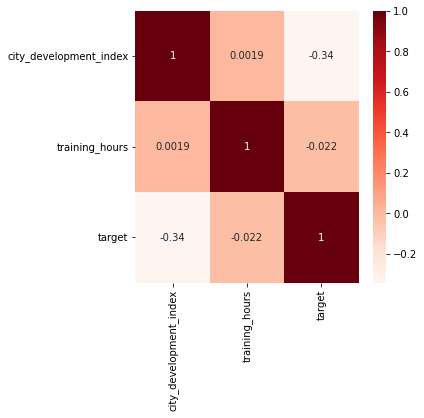

In [573]:
#Correlação entre os dados numéricos
plt.figure(figsize=(5,5))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [574]:
#Features numéricas relevantes
target = abs(cor["target"])
relevant_features = target[target>0.5]
relevant_features

target    1.0
Name: target, dtype: float64

Podemos ver, então, que os dados numéricos pouco se relacionam com o nosso target. Podemos dispensá-los quando formos preparar o modelo de previsão.

array([[<AxesSubplot:xlabel='city_development_index', ylabel='city_development_index'>,
        <AxesSubplot:xlabel='training_hours', ylabel='city_development_index'>,
        <AxesSubplot:xlabel='target', ylabel='city_development_index'>],
       [<AxesSubplot:xlabel='city_development_index', ylabel='training_hours'>,
        <AxesSubplot:xlabel='training_hours', ylabel='training_hours'>,
        <AxesSubplot:xlabel='target', ylabel='training_hours'>],
       [<AxesSubplot:xlabel='city_development_index', ylabel='target'>,
        <AxesSubplot:xlabel='training_hours', ylabel='target'>,
        <AxesSubplot:xlabel='target', ylabel='target'>]], dtype=object)

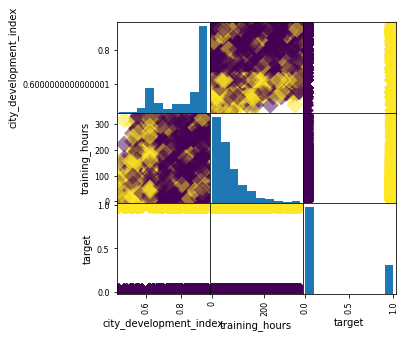

In [575]:
pd.plotting.scatter_matrix(train, c = train.target, figsize = [5, 5],
s=150, marker = 'D')

A matriz de dispersão acima apenas confirma o que já sabíamos: não é possível predizer nosso target a partir das variáveis numéricas.

In [576]:
train.info()
nominal_columns=['city','gender','relevant_experience','enrolled_university','education_level', 
'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  19158 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     19158 non-null  object 
 5   education_level         19158 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19158 non-null  object 
 8   company_size            19158 non-null  object 
 9   company_type            19158 non-null  object 
 10  last_new_job            19158 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


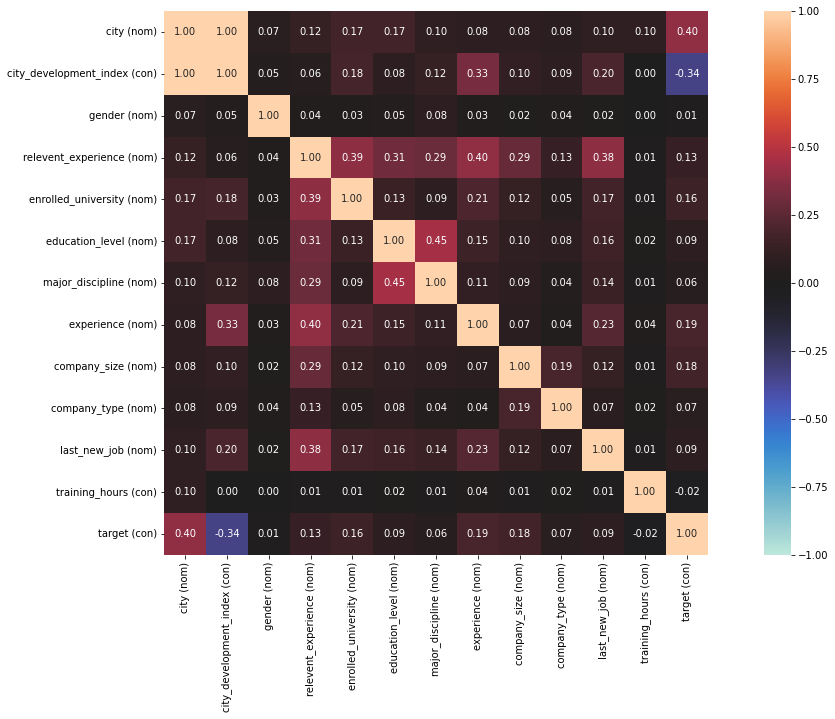

{'corr':                               city (nom)  city_development_index (con)  \
 city (nom)                      1.000000                      1.000000   
 city_development_index (con)    1.000000                      1.000000   
 gender (nom)                    0.069590                      0.046144   
 relevent_experience (nom)       0.123375                      0.059808   
 enrolled_university (nom)       0.168314                      0.183099   
 education_level (nom)           0.165082                      0.083660   
 major_discipline (nom)          0.099117                      0.123731   
 experience (nom)                0.081897                      0.334967   
 company_size (nom)              0.080334                      0.103343   
 company_type (nom)              0.075887                      0.090652   
 last_new_job (nom)              0.099486                      0.200133   
 training_hours (con)            0.098656                      0.001920   
 target (con)    

In [577]:
#heatmap com as relações entre todos os dados (vamos considerar agora apenas os categóricos)
associations(train,figsize=(20,10),mark_columns=True)

Podemos perceber, a partir disso, que não há uma relação tão intrínseca assim entre as features e nosso target. 

No entanto, podemos destacar 'city', 'relevent_experience', 'enrolled_university', 'experience' e 'company_size' como as mais interessantes dentre todas, pois apresentam as maiores correlações conforme o heatmap acima.

# Modelos

In [578]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  19158 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     19158 non-null  object 
 5   education_level         19158 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19158 non-null  object 
 8   company_size            19158 non-null  object 
 9   company_type            19158 non-null  object 
 10  last_new_job            19158 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


In [579]:
#features relevantes
features = ['city', 'relevent_experience', 'enrolled_university', 'experience', 'company_size']
example = train[features]
#transforma as features categóricas escolhidas em números
data_dummies = pd.get_dummies(data = example, drop_first = True) 
data_dummies.fillna(data_dummies.mean(),inplace=True)


In [580]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Columns: 154 entries, city_city_10 to company_size_<10
dtypes: uint8(154)
memory usage: 3.0 MB


##  k-NN

In [581]:
#separa o dataset de treino e os valores de target
X = data_dummies
y = train['target'].values

#divide o dataset em partes de treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify = y)

#instancia o classificador 
knn = KNeighborsClassifier()

#ajusta o classificador aos dados 
knn.fit(X_train,y_train)

#realiza a predição
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)

#métricas
print(f'Acurácia no treino: {accuracy_score(y_train, y_train_predict):.2}')
print(f'Acurácia no teste: {accuracy_score(y_test, y_test_predict):.2}')

print('Confusion matrix: ')
print(confusion_matrix(y_test, y_test_predict))
print('Classification report: ')
print(classification_report(y_test, y_test_predict))

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


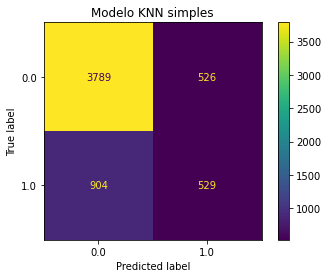

In [ ]:
#plotando a matriz de confusão acima

plot_confusion_matrix(knn, X_test, y_test) 
plt.title('Modelo KNN simples')
plt.show()

A partir do Classification report, podemos ver que o modelo acima classifica corretamente uma grande quantidade da classe 0, mas classifica corretamente apenas uma quantidade razoável da classe 1 (precision e recall). É um modelo, portanto, que classifica melhor a classe 0 do que a 1.

A acurácia do modelo é de 75%, o que permite afirmar que nosso modelo é relativamente bom para a predição dos dados.


In [ ]:
#vamos tunar o hiperparâmetro n_neighbors utilizando o GSCV

#valores do hiperparâmetro a serem testados
param_grid = {'n_neighbors': np.arange(1, 50)}

#instancia segundo modelo knn

knn_sec = KNeighborsClassifier()

#instancia o classificador knn com GDCV
knn_cv = GridSearchCV(knn_sec, param_grid, cv=5)

#ajusta o classificador aos dados 
knn_cv.fit(X, y)

#o melhor dos parâmetros
print(f'Melhor parâmetro: {knn_cv.best_params_}')

#a melhor acurácia
print(f'Melhor acurácia: {knn_cv.best_score_.round(2)}')

Melhor parâmetro: {'n_neighbors': 49}
Melhor acurácia: 0.77


In [ ]:
#divide o dataset em partes de treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify = y)

#instancia o classificador 
knn_third = KNeighborsClassifier(n_neighbors = 49)

#ajusta o classificador aos dados 
knn_third.fit(X_train,y_train)

#realiza a predição
y_test_predict = knn_third.predict(X_test)
y_train_predict = knn_third.predict(X_train)

#métricas
print(f'Acurácia no treino: {accuracy_score(y_train, y_train_predict):.2}')
print(f'Acurácia no teste: {accuracy_score(y_test, y_test_predict):.2}')

print('Confusion matrix: ')
print(confusion_matrix(y_test, y_test_predict))
print('Classification report: ')
print(classification_report(y_test, y_test_predict))

Acurácia no treino: 0.78
Acurácia no teste: 0.77
Confusion matrix: 
[[3908  407]
 [ 912  521]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      4315
         1.0       0.56      0.36      0.44      1433

    accuracy                           0.77      5748
   macro avg       0.69      0.63      0.65      5748
weighted avg       0.75      0.77      0.75      5748



C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


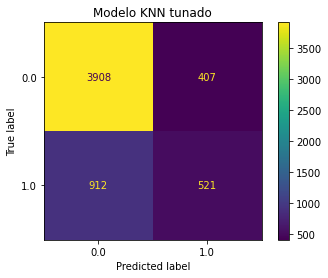

In [ ]:
#plotando a matriz de confusão acima

plot_confusion_matrix(knn_third, X_test, y_test) 
plt.title('Modelo KNN tunado')
plt.show()

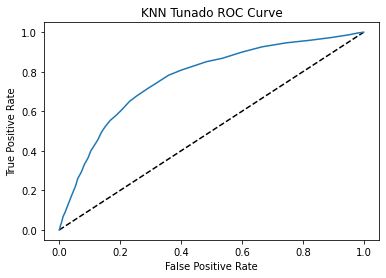

In [ ]:
y_pred_prob = knn_third.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Tunado ROC Curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_prob).round(2)

0.77

Vemos que o novo modelo (tunado) apresenta um desempenho melhor que o anterior, pois apresenta acurácia maior (77%), maior recall para a classe 0 (91%) e maior precision para a classe 1 (56%).

Em contrapartida, a precision da classe 0 permanece a mesma (81%) frente ao modelo anterior e o recall da classe 1 diminui em 1%. 

Por conta disso, a quantidade de TP aumenta e a de TN diminui, conforme a confusion matrix plotada acima.

No geral, podemos considerá-lo um bom modelo para a nossa predição.

## Regressão Logística

Acurácia no treino: 0.78
Acurácia no teste: 0.77
Confusion matrix: 
[[3971  329]
 [1008  440]]


C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


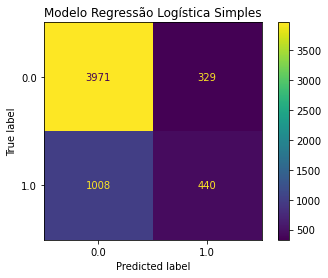

Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86      4300
         1.0       0.57      0.30      0.40      1448

    accuracy                           0.77      5748
   macro avg       0.68      0.61      0.63      5748
weighted avg       0.74      0.77      0.74      5748



In [ ]:
#modelo
logreg = LogisticRegression(max_iter=100000)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
logreg.fit(X_train, y_train)
y_train_predict = logreg.predict(X_train)
y_test_predict = logreg.predict(X_test)

#métricas
print(f'Acurácia no treino: {accuracy_score(y_train, y_train_predict):.2}')
print(f'Acurácia no teste: {accuracy_score(y_test, y_test_predict):.2}')

print('Confusion matrix: ')
print(confusion_matrix(y_test, y_test_predict))
#plotando a matriz de confusão
plot_confusion_matrix(logreg, X_test, y_test) 
plt.title('Modelo Regressão Logística Simples')
plt.show()
print('Classification report: ')
print(classification_report(y_test, y_test_predict))

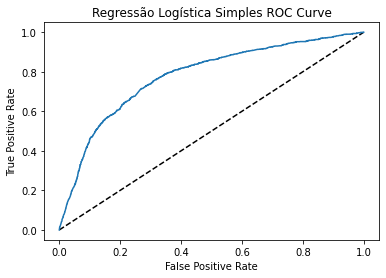

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Regressão Logística Simples ROC Curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_prob).round(2)

0.79

Vemos que o modelo de regressão logística segue um desempenho semelhante ao KNN tunado, com a diferença de que apresenta uma maior quantidade de TP. Há, ainda, leves diferenças nos valores de precision e recall entre os dois modelos.

No geral, podemos afirmar que ambos atendem à nossa predição de forma satisfatória e semelhante.

## Árvore de decisão

Acurácia no treino: 0.78
Acurácia no teste: 0.78
Confusion matrix: 
[[3978  337]
 [ 952  481]]


C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


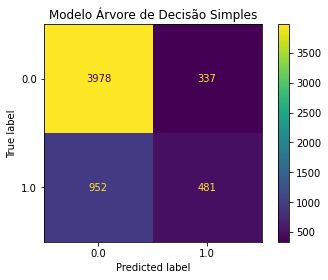

Classification report: 
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      4315
         1.0       0.59      0.34      0.43      1433

    accuracy                           0.78      5748
   macro avg       0.70      0.63      0.64      5748
weighted avg       0.75      0.78      0.75      5748



In [ ]:
#modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify = y)
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

#realiza a predição
y_test_predict = tree.predict(X_test)
y_train_predict = tree.predict(X_train)

#métricas
print(f'Acurácia no treino: {accuracy_score(y_train, y_train_predict):.2}')
print(f'Acurácia no teste: {accuracy_score(y_test, y_test_predict):.2}')

print('Confusion matrix: ')
print(confusion_matrix(y_test, y_test_predict))
#plotando a matriz de confusão
plot_confusion_matrix(tree, X_test, y_test) 
plt.title('Modelo Árvore de Decisão Simples')
plt.show()
print('Classification report: ')
print(classification_report(y_test, y_test_predict))

Vemos que o modelo acima é bem melhor que os modelos KNN, quando comparamos as métricas.

Tanto a precision como o recall e a accuracy são maiores utilizando o modelo de árvores.

Ainda que o modelo continue classificando melhor a classe 0, as métricas para a classe 1 aumentam seus valores no modelo de árvore, o que é bastante positivo.

A seguir, vamos utilizar a ferramenta de GridSearchCV para buscar os melhores hiperparâmetros para nosso modelo de árvore.

In [ ]:
#lista dos parâmetros a serem testados
params = {'ccp_alpha': [0.1, .001, .0001], 'min_samples_leaf': np.arange(2,10), 'max_depth' : np.arange(2, 10)}

#encontra os melhores parâmetros
tree_cv = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 1024), param_grid = params, cv = 5, verbose = True)

#modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify = y)
tree_cv.fit(X_train, y_train)

#indica quais são os melhores parâmetros
tree_cv.best_estimator_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


DecisionTreeClassifier(ccp_alpha=0.001, max_depth=3, min_samples_leaf=2,
                       random_state=1024)

In [ ]:
#lista dos parâmetros a serem testados
params = {'max_leaf_nodes': np.arange(2, 10), 'min_samples_split': np.arange(2, 10), 'max_features': ['auto', 'sqrt', 'log2']}

#encontra os melhores parâmetros
tree_cv = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 1024), param_grid = params, cv = 5, verbose = True)

#modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify = y)
tree_cv.fit(X_train, y_train)

#indica quais são os melhores parâmetros
tree_cv.best_estimator_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


DecisionTreeClassifier(max_features='auto', max_leaf_nodes=9, random_state=1024)

Acurácia no treino: 0.78
Acurácia no teste: 0.78
Confusion matrix: 
[[3961  354]
 [ 929  504]]


C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


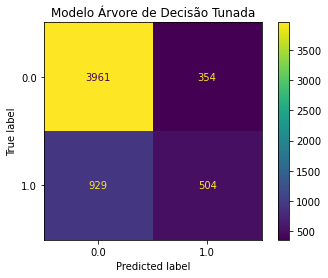

Classification report: 
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      4315
         1.0       0.59      0.35      0.44      1433

    accuracy                           0.78      5748
   macro avg       0.70      0.63      0.65      5748
weighted avg       0.75      0.78      0.76      5748



In [ ]:
#modelo tunado
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify = y)
tree_sec = DecisionTreeClassifier(criterion = "gini", random_state = 1024, max_depth=3, min_samples_leaf = 2, ccp_alpha = 0.001, max_leaf_nodes= 9)
tree_sec.fit(X_train, y_train)

#realiza a predição
y_test_predict = tree_sec.predict(X_test)
y_train_predict = tree_sec.predict(X_train)

#métricas
print(f'Acurácia no treino: {accuracy_score(y_train, y_train_predict):.2}')
print(f'Acurácia no teste: {accuracy_score(y_test, y_test_predict):.2}')

print('Confusion matrix: ')
print(confusion_matrix(y_test, y_test_predict))
#plotando a matriz de confusão
plot_confusion_matrix(tree_sec, X_test, y_test) 
plt.title('Modelo Árvore de Decisão Tunada')
plt.show()
print('Classification report: ')
print(classification_report(y_test, y_test_predict))

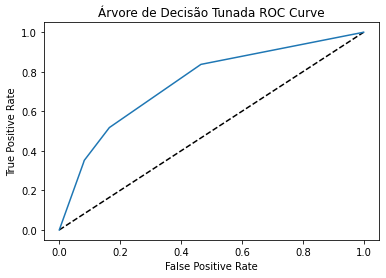

In [ ]:
y_pred_prob = tree_sec.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Árvore de Decisão Tunada ROC Curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_prob).round(2)

0.75

Vemos que, apesar da accuracy do modelo tunado permanecer a mesma do anterior, ainda assim, esse modelo é levemente melhor que o outro, haja vista que há um pequeno aumento no recall da classe 1 e uma melhor distribuição na confusion mattrix.

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Acurácia no treino: 0.79
Acurácia no teste: 0.78
Estimativa de Out-of-bag score: 0.77
Confusion matrix: 
[[3978  337]
 [ 954  479]]


C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


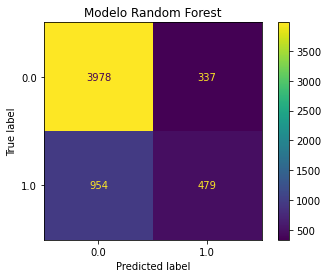

Classification report: 
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      4315
         1.0       0.59      0.33      0.43      1433

    accuracy                           0.78      5748
   macro avg       0.70      0.63      0.64      5748
weighted avg       0.75      0.78      0.75      5748



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify = y)
rf = RandomForestClassifier(max_depth=25, n_estimators=200, min_samples_split=50, criterion='entropy', oob_score=True, random_state=42)
rf.fit(X_train, y_train)
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

#métricas
print(f'Acurácia no treino: {accuracy_score(y_train, y_train_predict):.2}')
print(f'Acurácia no teste: {accuracy_score(y_test, y_test_predict):.2}')
print(f'Estimativa de Out-of-bag score: {rf.oob_score_:.2}')

print('Confusion matrix: ')
print(confusion_matrix(y_test, y_test_predict))
#plotando a matriz de confusão
plot_confusion_matrix(rf, X_test, y_test) 
plt.title('Modelo Random Forest')
plt.show()
print('Classification report: ')
print(classification_report(y_test, y_test_predict))

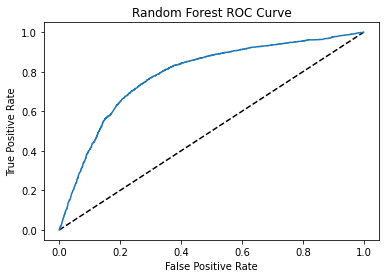

In [ ]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_prob).round(2)

0.79

## Naive-Bayes Gaussiano

Acurácia no treino: 0.39
Acurácia no teste: 0.39
Confusion matrix: 
[[ 945 3355]
 [ 130 1318]]


C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


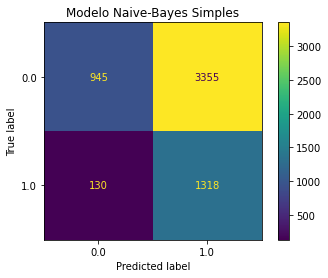

Classification report: 
              precision    recall  f1-score   support

         0.0       0.88      0.22      0.35      4300
         1.0       0.28      0.91      0.43      1448

    accuracy                           0.39      5748
   macro avg       0.58      0.56      0.39      5748
weighted avg       0.73      0.39      0.37      5748



In [ ]:
#modelo
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_train_predict = gnb.predict(X_train)
y_test_predict = gnb.predict(X_test)

#métricas
print(f'Acurácia no treino: {accuracy_score(y_train, y_train_predict):.2}')
print(f'Acurácia no teste: {accuracy_score(y_test, y_test_predict):.2}')

print('Confusion matrix: ')
print(confusion_matrix(y_test, y_test_predict))
#plotando a matriz de confusão
plot_confusion_matrix(gnb, X_test, y_test) 
plt.title('Modelo Naive-Bayes Simples')
plt.show()
print('Classification report: ')
print(classification_report(y_test, y_test_predict))

In [ ]:
#tunando o hiperparâmetro do modelo

params = {'var_smoothing': np.logspace(0,-50, num=100)}
gnb_cv = GridSearchCV(estimator=GaussianNB(), param_grid=params, verbose= True, cv=5)
gnb_cv.fit(X_train, y_train)
gnb_cv.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GaussianNB(var_smoothing=1.0)

Acurácia no treino: 0.76
Acurácia no teste: 0.75
Confusion matrix: 
[[3849  451]
 [ 965  483]]


C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


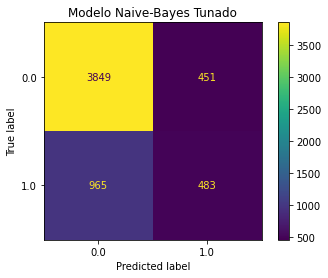

Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.90      0.84      4300
         1.0       0.52      0.33      0.41      1448

    accuracy                           0.75      5748
   macro avg       0.66      0.61      0.63      5748
weighted avg       0.73      0.75      0.73      5748



In [ ]:
#modelo tunado

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
gnb_tuned = GaussianNB(var_smoothing=1.0)
gnb_tuned.fit(X_train, y_train)
y_train_predict = gnb_tuned.predict(X_train)
y_test_predict = gnb_tuned.predict(X_test)

#métricas
print(f'Acurácia no treino: {accuracy_score(y_train, y_train_predict):.2}')
print(f'Acurácia no teste: {accuracy_score(y_test, y_test_predict):.2}')

print('Confusion matrix: ')
print(confusion_matrix(y_test, y_test_predict))
#plotando a matriz de confusão
plot_confusion_matrix(gnb_tuned, X_test, y_test) 
plt.title('Modelo Naive-Bayes Tunado')
plt.show()
print('Classification report: ')
print(classification_report(y_test, y_test_predict))

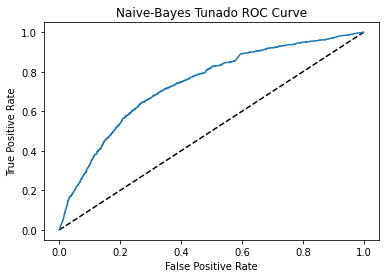

In [ ]:
y_pred_prob = gnb_tuned.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive-Bayes Tunado ROC Curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_prob).round(2)

0.74

Podemos ver que o modelo tunado ficou, dessa vez, muito melhor quanto à predição do que o modelo anterior. O salto no score da accuracy foi notório!

Além disso, é importante notar que, em termos de métricas e ROC Curve, apresenta um desempenho bastante similar aos demais modelos de classificação testados anteriormente.

## SVM

Acurácia no treino: 0.79
Acurácia no teste: 0.77
Confusion matrix: 
[[3850  450]
 [ 870  578]]


C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


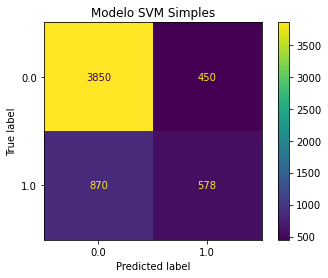

Classification report: 
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.85      4300
         1.0       0.56      0.40      0.47      1448

    accuracy                           0.77      5748
   macro avg       0.69      0.65      0.66      5748
weighted avg       0.75      0.77      0.76      5748



In [ ]:
#modelo
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
svm = SVC(probability = True)
svm.fit(X_train, y_train)
y_train_predict = svm.predict(X_train)
y_test_predict = svm.predict(X_test)

#métricas
print(f'Acurácia no treino: {accuracy_score(y_train, y_train_predict):.2}')
print(f'Acurácia no teste: {accuracy_score(y_test, y_test_predict):.2}')

print('Confusion matrix: ')
print(confusion_matrix(y_test, y_test_predict))
#plotando a matriz de confusão
plot_confusion_matrix(svm, X_test, y_test) 
plt.title('Modelo SVM Simples')
plt.show()
print('Classification report: ')
print(classification_report(y_test, y_test_predict))

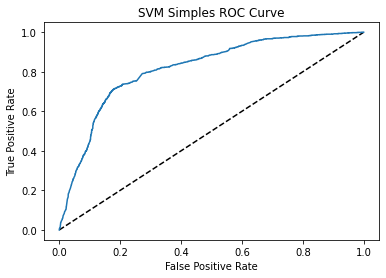

In [ ]:
y_pred_prob = svm.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Simples ROC Curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_prob).round(2)

0.82

# Considerações finais

Considerando os plots da ROC Curve de cada modelo apontado e a AUC calculada logo em seguida, percebemos que o melhor modelo para nossa predição é o SVM (AUC = 0.82). Sua accuracy é 77%, enquanto a de outros modelos, como os de árvore de decisão, é 78%.

Nota-se, portanto, que há pequenas diferenças nas métricas entre os modelos treinados, alguns ganham na acurácia, enquanto outros no TPR/FPR e ROC Curve/AUC. Mas, essas diferenças não chegam a ser tão grandes. 

Por conta disso, podemos concluir que, para esse contexto, todos os modelos apresentam um desempenho semelhante na predição dos dados.

É importante salientar, claro, que essa comparação e conclusão só puderam ser feitas haja vista que alguns modelos foram otimizados/tunados de forma que pudessem ter um desempenho próximo ao dos demais. O Naive-Bays Gaussiano, por exemplo, apresentava um baixo desempenho, a princípio, mas, após o uso do GridSearchCV, atingiu a accuracy de 77%.

